In [ ]:
!pip install ftfy
#librerias 
import pandas as pd
import numpy  as np
import spacy.cli
import spacy
import re 
from ftfy import fix_encoding
from spacy import displacy
from gensim.models.phrases import Phrases, Phraser
from collections import defaultdict  # For word frequency
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!spacy download es_core_news_sm
#!python -m spacy download es_core_news_sm
nlp = spacy.load('es_core_news_sm')

In [ ]:
ruta_archivo="/content/drive/My Drive/NLP TALLER/tary.txt"
f = open (ruta_archivo,'r',encoding="utf8")
texto = f.read()
f.close()
texto = re.sub('[ \t\n]+', ' ', texto) 
texto=fix_encoding(texto)
texto

'En este trabajo se presenta el análisis, diseño e implementación de TariyKDD,una herramienta genérica para el Descubrimiento de conocimiento en bases de datos, débilmente acoplada con el SGBD PostgreSQL. TariyKDD comprende cuatro módulos que cubren la conexión, a archivos planos y bases de datos relacionales, un módulo de utilidades con clases y librerías comunes, un módulo kernel que reune las etapas de preprocesamiento, minería y visualización, y el módulo de interfaz gráfica de usuario. Dentro del kernel de minería se implementan 5 algoritmos, Apriori, FPGrowth y EquipAsso para asociación y C4.5 y Mate para clasificación. Se evalúa el rendimiento de los algoritmos EquipAsso, un algoritmo para el cálculo de conjuntos de ítems frecuentes, y Mate, un algoritmo para la construcción de arboles de clasificación, basados en nuevos operadores del álgebra relacional, con respecto a los algoritmos Apriori y FP-Growth y C4.5, respectivamente. 1. INTRODUCCION El proceso de extraer conocimiento

In [ ]:
def tokenize(text):
    text=text.lower()
    doc1 = nlp(text)
    #lemmas = [t.norm_ for t in doc1 if not t.is_punct | t.is_stop]
    lemmas = [t.lemma_ for t in doc1 if not t.is_punct | t.is_stop]
    words = [t.lower() for t in lemmas if len(t) > 1 and t.isalpha()]
    return words

def tokenize1(text):
  text=text.lower()
  doc1 = nlp(text)
  words=[]
  for t in doc1:
    if  t.is_punct or  t.is_stop or t.is_space or len(str(t))<=3:
      continue
    if t.pos_=="VERB":
      words.append(str(t.lemma_))
    else:
      words.append(str(t))

    
  return words

token=tokenize1("desarrollo de un sistema de información que administre los datos de bienestar familiar EquipAsso")
token

['desarrollo',
 'sistema',
 'información',
 'administrar',
 'datos',
 'bienestar',
 'familiar',
 'equipasso']

In [ ]:
def entrenamiento(texto):
        doc=nlp(fix_encoding(texto))
        sent=[]
  
        for num,oracion in enumerate(doc.sents):
            o=tokenize1(str(oracion))
            sent.append(o) 
        print(sent)
        #Crea las frases relevantes de la lista de oraciones:
        phrases = Phrases(sent, min_count=30, progress_per=10000)
        #Transforme el corpus en función de las bigramas detectadas:
        bigram = Phraser(phrases)
        sentences = bigram[sent]
        
             
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        w2v_model = Word2Vec(min_count=3,
                     window=10,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores
                    )
        t = time()
        w2v_model.build_vocab(sentences,progress_per=10000)  # prepare the model vocabulary
        print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
        t = time()
        w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10000, report_delay=1)
        print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        

        return w2v_model
modelo=entrenamiento(texto)

[['presentar', 'análisis', 'diseño', 'implementación', 'tariykdd', 'herramienta', 'genérica', 'descubrimiento', 'conocimiento', 'bases', 'datos', 'débilmente', 'acoplada', 'sgbd', 'postgresql'], ['tariykdd', 'comprender', 'módulos', 'cubrir', 'conexión', 'archivos', 'planos', 'bases', 'datos', 'relacionales', 'módulo', 'utilidades', 'clases', 'librerías', 'comunes', 'módulo', 'kernel', 'reune', 'etapas', 'preprocesamiento', 'minería', 'visualización', 'módulo', 'interfaz', 'gráfica', 'usuario'], ['kernel', 'minería', 'implementar', 'algoritmos', 'apriori', 'fpgrowth', 'equipasso', 'asociación', 'c4.5', 'matar', 'clasificación'], ['evaluar', 'rendimiento', 'algoritmos', 'equipasso', 'algoritmo', 'cálculo', 'conjuntos', 'ítems', 'frecuentes', 'mate', 'algoritmo', 'construcción', 'arboles', 'clasificación', 'basados', 'operadores', 'álgebra', 'relacional', 'algoritmos', 'apriori', 'growth', 'c4.5', 'respectivamente'], [], ['introduccion', 'proceso', 'extraer', 'conocimiento', 'volúmenes',

In [ ]:
#Explorar el modelo
#w2v_model.init_sims(replace=True)
modelo.wv.most_similar(positive=['algoritmo'.lower()],topn=20)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('conjuntos', 0.9665751457214355),
 ('mate', 0.9564343690872192),
 ('obtener', 0.789652407169342),
 ('equipasso', 0.7535527944564819),
 ('tarea', 0.7510069608688354),
 ('atributos', 0.7280377149581909),
 ('aplicar', 0.7181423306465149),
 ('arquitectura', 0.7047818899154663),
 ('rendimiento', 0.7038307189941406),
 ('pruebas', 0.6882314682006836),
 ('resultado', 0.6649721264839172),
 ('c4.5', 0.658170223236084),
 ('algoritmos', 0.6475880146026611),
 ('clasificación', 0.6442971229553223),
 ('nariño', 0.6023038625717163),
 ('apriori', 0.5902184247970581),
 ('fpgrowth', 0.5879694819450378),
 ('asociación', 0.5320848226547241),
 ('acoplada', 0.43349117040634155),
 ('implementar', 0.4325714111328125)]

In [ ]:
modelo.wv.similarity("clasificación", 'asociación')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.89669603

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


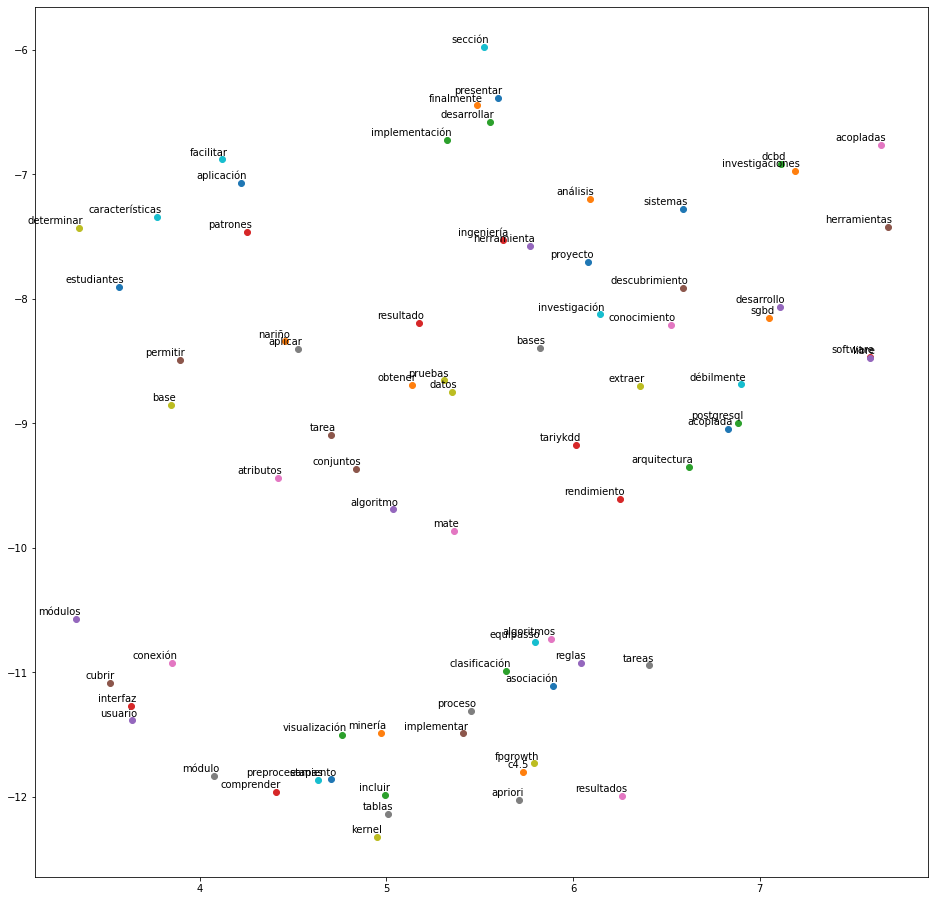

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(modelo)